In [14]:
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
from skimage import io, filters, color, measure
from skimage.feature import peak_local_max
from scipy import ndimage 
import numpy as np
import xlrd
import freud.box
from freud import box, density
from scipy import stats
import os
%matplotlib inline

def get_dots(file,microns=2,compare=False,spacing=40,threshold=.55):
    image = color.rgb2gray(io.imread(file))
    i1 = ndimage.maximum_filter(image,size=spacing,mode='constant')
    i1 = rescale_intensity(i1,in_range=(threshold,1))
    i1 = filters.gaussian(i1)
    coordinates = peak_local_max(i1, min_distance=spacing,indices=False)
    if compare:
        io.imshow(image-coordinates)
    label_img = measure.label(coordinates)
    centroids = []
    for region in measure.regionprops(label_img):
        centroids.append(region.centroid)
    scaled = microns*np.asarray(centroids)/image.shape - [microns/2,microns/2]
    return np.append(scaled,np.zeros((len(scaled),1)),axis=1)
    

In [20]:
rdfs = []
L = 2
box = freud.box.Box(L,L,is2D=True)
box.periodic=[True,True,False]
rdf = freud.density.RDF(20,.9,normalize=True)


<ipython-input-14-2911865e733a>:15: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image = color.rgb2gray(io.imread(file))


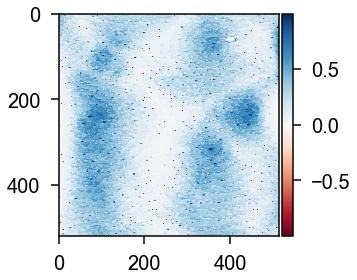

In [21]:
dots=get_dots("106/20.tif",compare=True,threshold=.1, spacing=3)
rdf.compute(system=(box,dots),reset=True)
rdfs.append(rdf.rdf)

<ipython-input-14-2911865e733a>:15: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image = color.rgb2gray(io.imread(file))


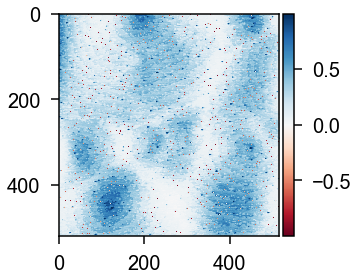

In [22]:
dots=get_dots("106/21.tif",compare=True,threshold=.1, spacing=2)
rdf.compute(system=(box,dots),reset=True)
rdfs.append(rdf.rdf)

<ipython-input-14-2911865e733a>:15: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image = color.rgb2gray(io.imread(file))


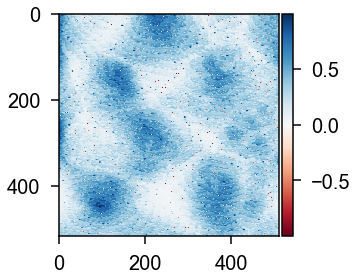

In [23]:
dots=get_dots("106/22.tif",compare=True,threshold=.1, spacing=3)
rdf.compute(system=(box,dots),reset=True)
rdfs.append(rdf.rdf)


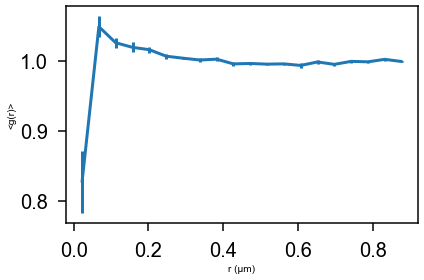

In [24]:
rdfs = np.asarray(rdfs)
mean_count = np.mean(rdfs,axis=0)
sem =  stats.sem(rdfs, axis=0, ddof=1)
plt.errorbar(rdf.bin_centers, mean_count, yerr=sem)
plt.xlabel("r (μm)")
plt.ylabel("<g(r)>")
plt.show()

In [25]:
#87
